**Loading and Visualizing Datasets from Files with Bokeh**<br>

[1] *Dataset: killeen_temp_2022-04_2022-07.csv*<br>
Define a figure() that contains three elements representing high and low temperatures per day:
1. One lineplot representing high temperatures per day
2. Another lineplot representing low temperatures per day
3. An area chart that covers the area between high and low temperatures<br>
Expected output:<br>
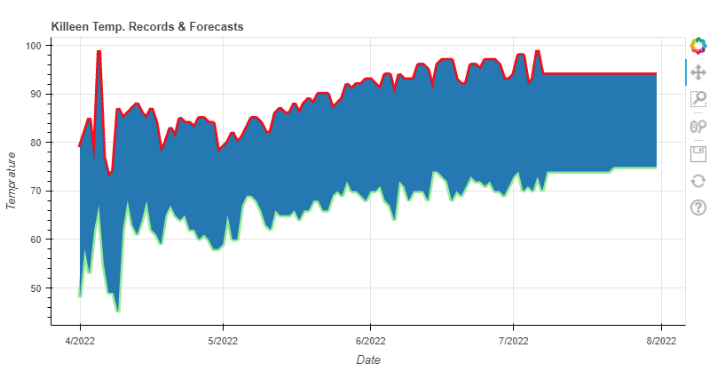

In [9]:
import pandas as pd
from bokeh.plotting import figure, show

# reading the data from file
temps = pd.read_csv('killeen_temp_2022-04_2022-07.csv')

# converting the time column to datetime
temps['time'] = pd.to_datetime(temps['Date'])

# rectangular figure
k = figure(title='Killeen Temp. Records & Forecasts', x_axis_type="datetime",
width=800, height=400)

# x and y axis labels
k.yaxis.axis_label = "Temperature"
k.xaxis.axis_label = "Date"

# lineplot of high temps per day
k.line(temps['time'], temps['High'],
         line_color="red",
         line_width=5)

# lineplot of low temps per day
k.line(temps['time'], temps['Low'],
         line_color="lightgreen",
         line_width=5)

#area chart thats covers area between high and low temps
k.varea(x=temps['time'], y1=temps['High'], y2=temps['Low'])

show(k)

[2] *Dataset: us_population_2020_1910.csv*

Load the dataset from file by using read_csv() method from Python’s Pandas as
directed above. Use ColumnDataSource to create your data object, by creating a dictionary (dict() object)
as an argument that is passed to the ColumnDataSource() function. 
Define a figure() with stacked area plots varea_stack() that shows how population has changed during the past century in different US regions. Expected output:<br>

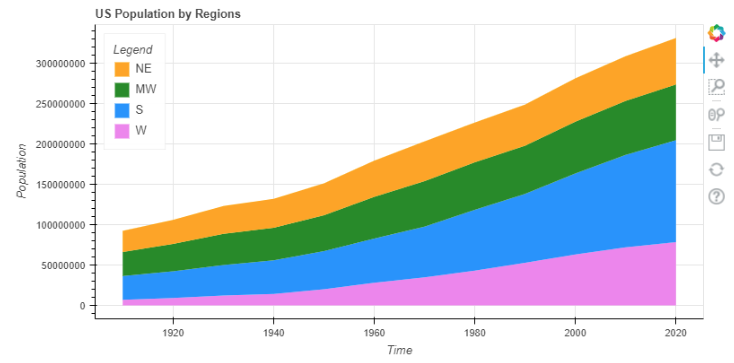

In [7]:
import pandas as pd
from bokeh.models import ColumnDataSource, Legend, NumeralTickFormatter
from bokeh.plotting import figure, show

# reading the data from file
pop = pd.read_csv('us_population_2020_1910.csv')
# converting the year column to datetime
pop['Year'] = pd.to_datetime(pop['Year'])

# create a ColumnDataSource
source = ColumnDataSource(data=dict(
    Year=pop['Year'],
    NE=pop['NE'],
    MW=pop['MW'],
    S=pop['S'],
    W=pop['W']
))

p = figure(title="US Population by Regions", 
           x_axis_type='datetime', y_axis_type='linear', x_axis_label='Time', y_axis_label='Population',
          width=800, height=400)

# add stacked area plots
p.varea_stack(['W', 'S', 'MW', 'NE'], 
              x='Year', color=["violet", "dodgerblue", "forestgreen", "orange"], source=source)

# create a legend
legend = Legend(items=[
    ("NE", [p.renderers[3]]),
    ("MW", [p.renderers[2]]),
    ("S", [p.renderers[1]]),
    ("W", [p.renderers[0]])], 
    location="top_left", 
    title="Legend")

# add the legend to the plot
p.add_layout(legend, 'center')

# format y-axis labels
p.yaxis.formatter = NumeralTickFormatter(format="0")

# Show the plot
show(p)
